# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **02.02.2024**

Мягкий дедлайн: **26.02.24 23:59**

Жесткий дедлайн: **09.03.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
\frac{\partial}{\partial w} Q(w) = \frac{2}{\ell} X^{T}(Xw - y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/108348609/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/108348669/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/108348738/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/108348809/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/108350825/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')
sns.set(rc={"figure.figsize": (8, 5)})

In [7]:
data0 = pd.read_csv('autos.csv')
data0.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

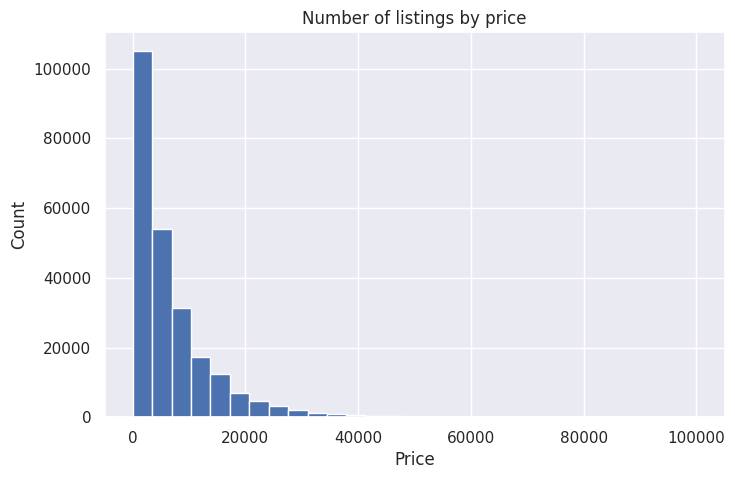

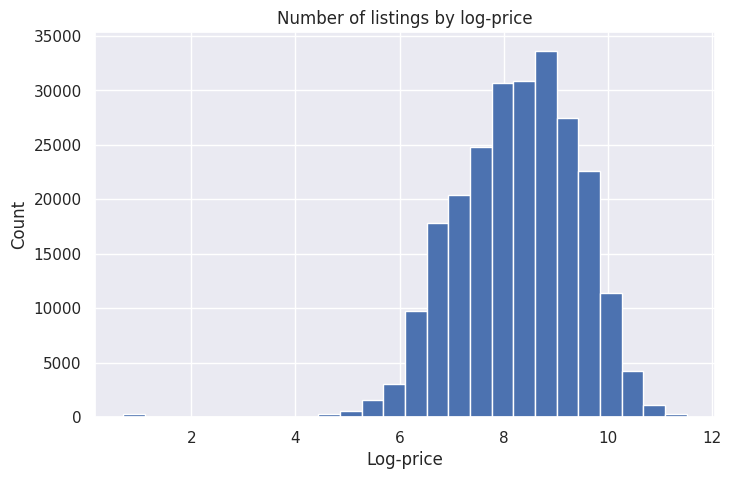

brand                  38
model                 249
vehicleType             8
gearbox                 2
fuelType                7
notRepairedDamage       2
powerPS               406
kilometer              13
autoAgeMonths         594
price                4919
Name: Number of unique values per feature, dtype: int64

In [8]:
plt.hist(data0["price"], bins="doane")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Number of listings by price")
plt.show()

plt.hist(np.log1p(data0["price"]), bins="doane")
plt.xlabel("Log-price")
plt.ylabel("Count")
plt.title("Number of listings by log-price")
plt.show()

data0.nunique().rename("Number of unique values per feature")

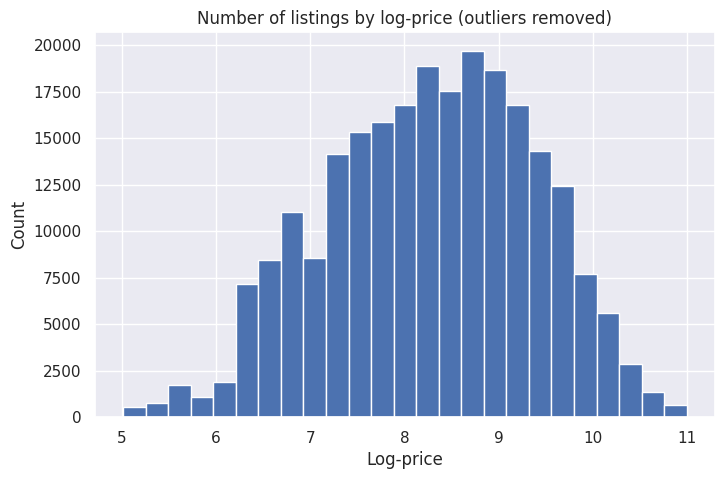

In [9]:
data1 = data0.assign(
    notRepairedDamage=(data0["notRepairedDamage"] == "ja").astype(int),
    gearbox=(data0["gearbox"] == "automatik").astype(int),
    price=np.log1p(data0["price"]),
)
data1 = data1[(data1["price"] > 5.0) & (data1["price"] < 11.0)]

plt.hist(data1["price"], bins="doane")
plt.xlabel("Log-price")
plt.ylabel("Count")
plt.title("Number of listings by log-price (outliers removed)")
plt.show()

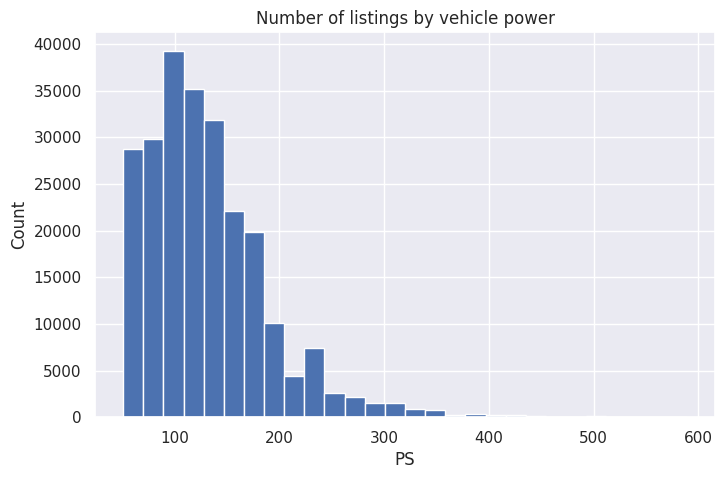

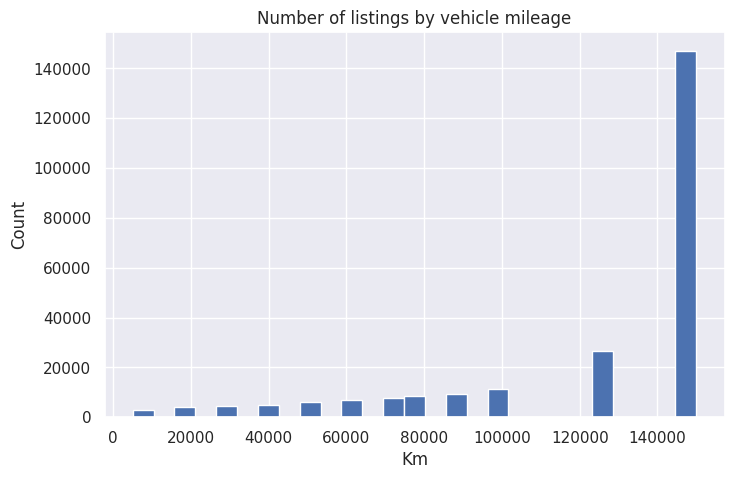

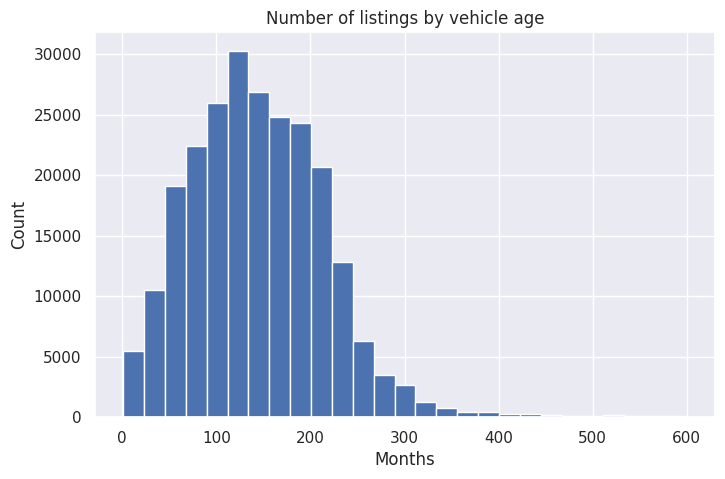

In [10]:
plt.hist(data1["powerPS"], bins="doane")
plt.xlabel("PS")
plt.ylabel("Count")
plt.title("Number of listings by vehicle power")
plt.show()

plt.hist(data1["kilometer"], bins="doane")
plt.xlabel("Km")
plt.ylabel("Count")
plt.title("Number of listings by vehicle mileage")
plt.show()

plt.hist(data1["autoAgeMonths"], bins="doane")
plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Number of listings by vehicle age")
plt.show()

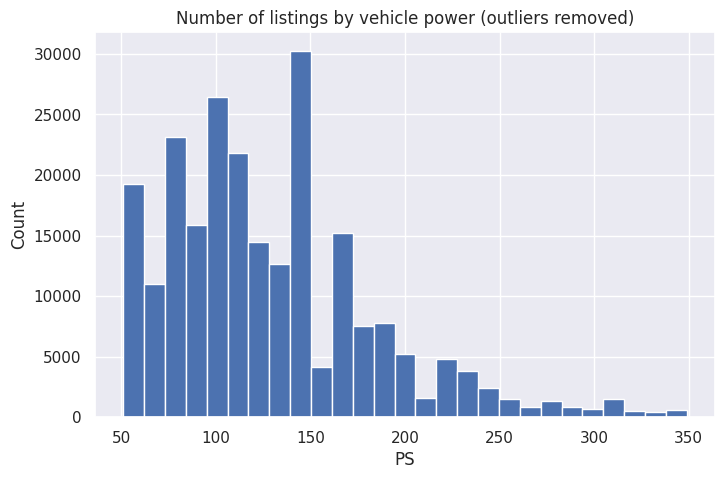

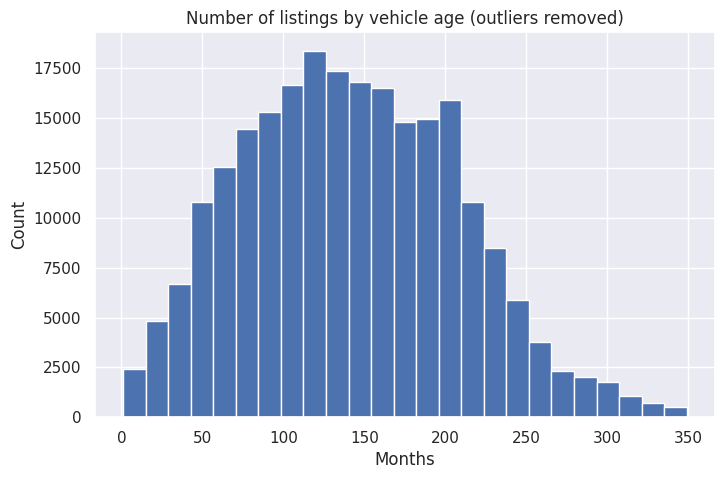

In [11]:
data2 = data1[(data1["powerPS"] < 350.0) & (data1["autoAgeMonths"] < 350.0)]

plt.hist(data2["powerPS"], bins="doane")
plt.xlabel("PS")
plt.ylabel("Count")
plt.title("Number of listings by vehicle power (outliers removed)")
plt.show()

plt.hist(data2["autoAgeMonths"], bins="doane")
plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Number of listings by vehicle age (outliers removed)")
plt.show()

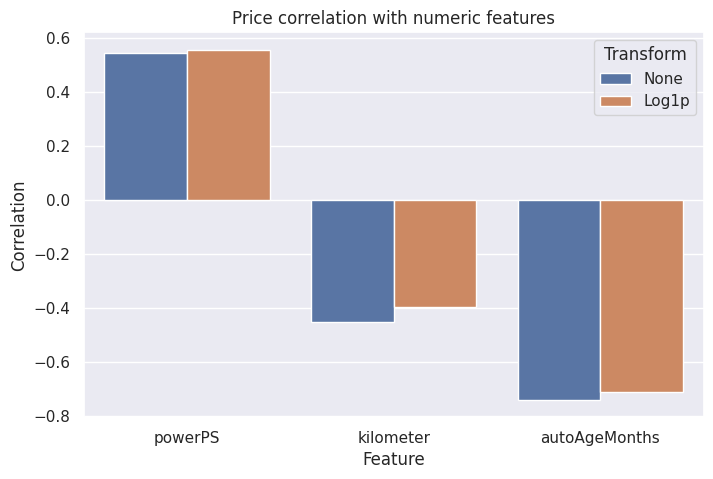

In [12]:
categorical = ["brand", "model", "vehicleType", "fuelType"]
numeric = ["powerPS", "kilometer", "autoAgeMonths"]
other = ["gearbox", "notRepairedDamage"]

corrs_plain = pd.DataFrame({"Feature": numeric, "Correlation": [data2[x].corr(data2["price"]) for x in numeric], "Transform": "None"})
corrs_log = pd.DataFrame({"Feature": numeric, "Correlation": [(np.log1p(data2[x])).corr(data2["price"]) for x in numeric], "Transform": "Log1p"})
corrs = pd.concat([corrs_plain, corrs_log])

sns.barplot(corrs, x="Feature", y="Correlation", hue="Transform")
plt.title("Price correlation with numeric features")
plt.show()

In [13]:
data3 = data2.assign(powerPS=np.log1p(data2["powerPS"]))

In [14]:
merge_lists = {x: [] for x in categorical}
merge_th = 0.02  # merged categories must make up in total no more than (merge_th * 100)% of all data points
merge_repl = "other"  # replacement category (all categorical features are objects)

for feature, merge_list in merge_lists.items():
    counts = data3[feature].value_counts().sort_values()
    total = counts.sum()
    cumsum = 0
    for category, count in counts.items():
        cumsum += count
        if (cumsum / total) > merge_th:
            break
        merge_list.append(category)

data4 = data3.copy()
for feature, merge_list in merge_lists.items():
    if len(merge_list) < 2:
        continue
    mask = data4[feature].isin(merge_list)
    print(f"Merging '{feature}' categories:" + "\n- ".join([""] + merge_list) + f"\nListings affected: {mask.sum()}\n")
    data4.loc[mask, feature] = merge_repl

Merging 'brand' categories:
- lada
- rover
- lancia
- daewoo
- jaguar
- saab
- daihatsu
- subaru
- jeep
- land_rover
- dacia
Listings affected: 4411

Merging 'model' categories:
- discovery_sport
- samara
- elefantino
- rangerover
- kaefer
- kalina
- i3
- 200
- kappa
- move
- materia
- charade
- musa
- 9000
- b_max
- terios
- 145
- delta
- lodgy
- croma
- lybra
- amarok
- nubira
- lanos
- gl
- v60
- 90
- crossfire
- range_rover_evoque
- r19
- range_rover
- kalos
- mii
- 900
- antara
- justy
- range_rover_sport
- citigo
- juke
- s_type
- niva
- aveo
- discovery
- exeo
- navara
- sirion
- g_klasse
- kadett
- defender
- outlander
- spark
- forester
- note
- cx_reihe
- cherokee
- calibra
- legacy
- v_klasse
- rx_reihe
- 300c
- x_type
- spider
- mustang
- roadster
- arosa
- wrangler
- s60
- ypsilon
- m_reihe
Listings affected: 4676

Merging 'fuelType' categories:
- elektro
- andere
- hybrid
- cng
- lpg
Listings affected: 4293



In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data5 = data4.assign(bias=1)
if "bias" not in other:
    other.append("bias")

column_transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
    ("scaling", StandardScaler(), numeric),
    ("other",  "passthrough", other),
])

x = np.array(column_transformer.fit_transform(data5[categorical + numeric + other]))
y = np.array(data5["price"])

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size=0.5, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [17]:
from pprint import pprint
from sklearn.metrics import r2_score


def make_config(descent_name="full", regularized=False, **kwargs):
    return dict(descent_name=descent_name, regularized=regularized, kwargs=kwargs)


results = {}
for descent in ["full", "stochastic", "momentum", "adam"]:
    descent_results = []
    for lam in np.logspace(-2, 0.5, 20):
        print(f"Fitting {descent} gradient descent with lambda={lam}")
        model = LinearRegression(make_config(descent, dimension=x.shape[1], lambda_=lam))
        model.fit(x_train, y_train)
        descent_results.append({
            "lambda": lam,
            "loss_train": model.calc_loss(x_train, y_train),
            "loss_valid": model.calc_loss(x_valid, y_valid),
            "loss_test": model.calc_loss(x_test, y_test),
            "loss_history": model.loss_history,
            "iter_count": len(model.loss_history),
            "r2": r2_score(y_test, model.predict(x_test)),
        })
        pprint({**descent_results[-1], "loss_history": ["..."]})
        print()
    results[descent] = descent_results

best_results = {key: min(value, key=lambda x: x["loss_valid"]) for key, value in results.items()}

Fitting full gradient descent with lambda=0.01
{'iter_count': 71,
 'lambda': 0.01,
 'loss_history': ['...'],
 'loss_test': 10.383569854629272,
 'loss_train': 10.474725220119629,
 'loss_valid': 10.445246208355726,
 'r2': -7.5531186163000275}

Fitting full gradient descent with lambda=0.01353876180022544
{'iter_count': 92,
 'lambda': 0.01353876180022544,
 'loss_history': ['...'],
 'loss_test': 7.50146195648688,
 'loss_train': 7.556042576757322,
 'loss_valid': 7.5735628464085,
 'r2': -5.179078564284875}

Fitting full gradient descent with lambda=0.018329807108324356
{'iter_count': 93,
 'lambda': 0.018329807108324356,
 'loss_history': ['...'],
 'loss_test': 4.760026245801251,
 'loss_train': 4.787299513700097,
 'loss_valid': 4.775806653566737,
 'r2': -2.920912524981804}

Fitting full gradient descent with lambda=0.024816289228368264
{'iter_count': 85,
 'lambda': 0.024816289228368264,
 'loss_history': ['...'],
 'loss_test': 2.975931954275357,
 'loss_train': 2.963195241166689,
 'loss_valid': 

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

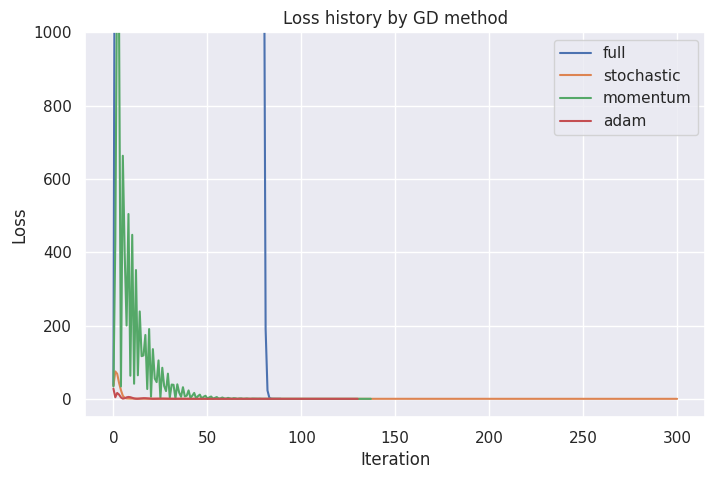

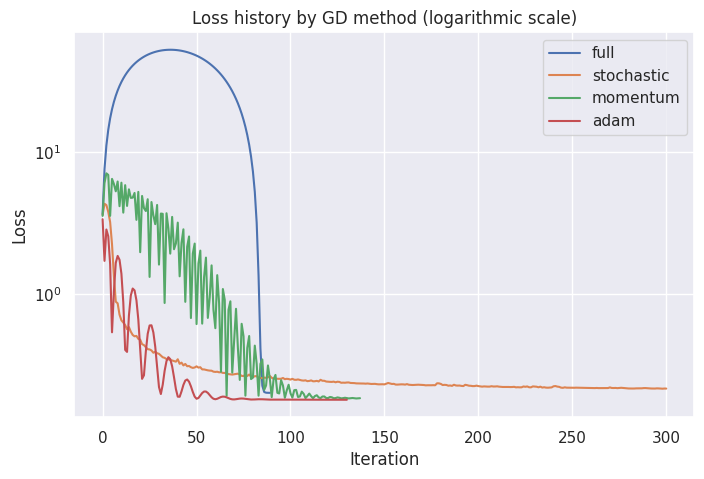

,lambda,loss_train,loss_valid,loss_test,loss_history,iter_count,r2
full,3.162278,0.219652,0.220473,0.22328,"[37.88236883175791, 2040.9643485982103, 73228....",90,0.81608
stochastic,0.941205,0.237232,0.238021,0.240189,"[35.71283477101446, 75.001780629891, 68.478020...",301,0.802153
momentum,1.725211,0.199615,0.201408,0.202945,"[33.88192206268785, 430.3680310890443, 1224.62...",138,0.832831
adam,1.725211,0.194129,0.196409,0.196853,"[27.97577846410277, 4.51153089772208, 16.20985...",131,0.837849


In [18]:
best_results_df = pd.DataFrame(best_results).T

for descent, loss_history in best_results_df["loss_history"].items():
    plt.plot(loss_history, label=descent)
plt.xlabel("Iteration")
plt.ylim(-50.0, 1000.0)
plt.ylabel("Loss")
plt.title("Loss history by GD method")
plt.legend()
plt.show()

for descent, loss_history in best_results_df["loss_history"].items():
    loss_history = np.log1p(loss_history)
    plt.plot(loss_history, label=descent)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss history by GD method (logarithmic scale)")
plt.legend()
plt.show()

best_results_df

- Полный градиентный спуск имеет свойство уходить очень далеко от минимума лосс функции
- Из-за отсутствия необходимости обрабатывать весь датасет на каждом шаге, стохастический градиентный спуск работает значительно быстрее
  других методов, но и результат у него получается несколько хуже; надо полагать, что полный потенциал стохастического метода раскрывается
  в комбинации с Momentum или Adam
- Momentum в целом похож на полный градиентный спуск с улучшенной стабильностью
- Adam достигает наилучшего результата и допускает при этом довольно большие значения $\lambda$ без потери качества

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [19]:
import time

batch_sizes = np.arange(15, 1500, 15)
# batch_sizes = np.arange(5, 50, 10)
avg_times = []
avg_iter_counts = []
avg_iter_times = []
avg_losses = []

for batch_size in batch_sizes:
    times = []
    iter_counts = []
    losses = []
    print(f"Fitting model with batch size {batch_size} ", end="")
    for _ in range(5):
        model = LinearRegression(make_config("stochastic", dimension=x.shape[1], lambda_=0.9, batch_size=batch_size), max_iter=1000)
        t = time.time()
        model.fit(x_train, y_train)
        t = time.time() - t
        times.append(t)
        iter_counts.append(len(model.loss_history))
        losses.append(model.calc_loss(x_valid, y_valid))
        print("~", end="")
    print()
    avg_times.append(np.mean(times))
    avg_iter_counts.append(np.mean(iter_counts))
    avg_iter_times.append(np.mean([x / y for x, y in zip(times, iter_counts)]))
    avg_losses.append(np.mean(losses))

Fitting model with batch size 15 ~~~~~
Fitting model with batch size 30 ~~~~~
Fitting model with batch size 45 ~~~~~
Fitting model with batch size 60 ~~~~~
Fitting model with batch size 75 ~~~~~
Fitting model with batch size 90 ~~~~~
Fitting model with batch size 105 ~~~~~
Fitting model with batch size 120 ~~~~~
Fitting model with batch size 135 ~~~~~
Fitting model with batch size 150 ~~~~~
Fitting model with batch size 165 ~~~~~
Fitting model with batch size 180 ~~~~~
Fitting model with batch size 195 ~~~~~
Fitting model with batch size 210 ~~~~~
Fitting model with batch size 225 ~~~~~
Fitting model with batch size 240 ~~~~~
Fitting model with batch size 255 ~~~~~
Fitting model with batch size 270 ~~~~~
Fitting model with batch size 285 ~~~~~
Fitting model with batch size 300 ~~~~~
Fitting model with batch size 315 ~~~~~
Fitting model with batch size 330 ~~~~~
Fitting model with batch size 345 ~~~~~
Fitting model with batch size 360 ~~~~~
Fitting model with batch size 375 ~~~~~
Fittin

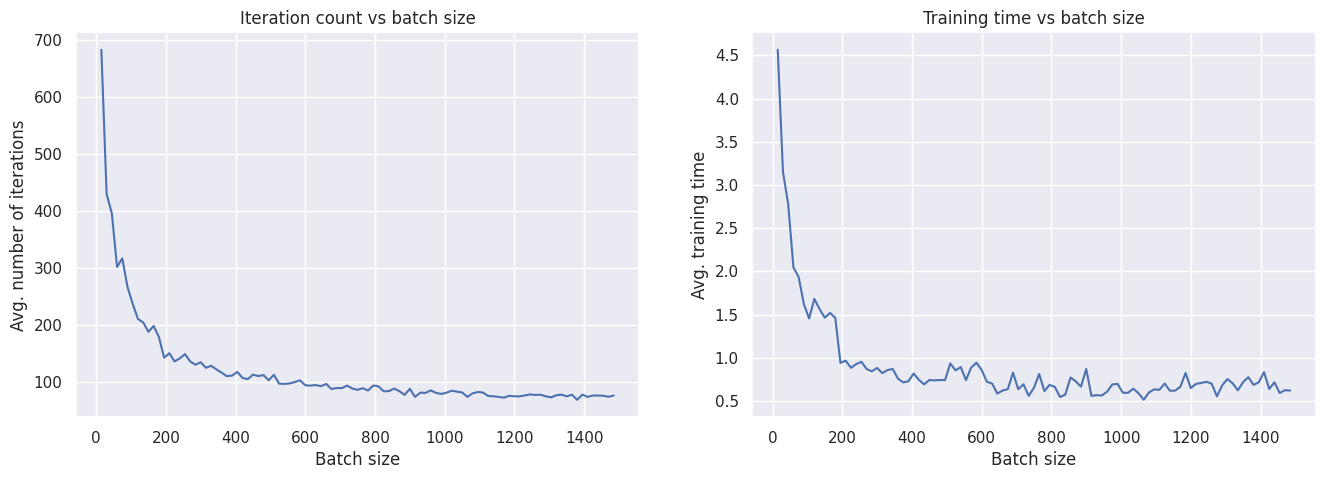

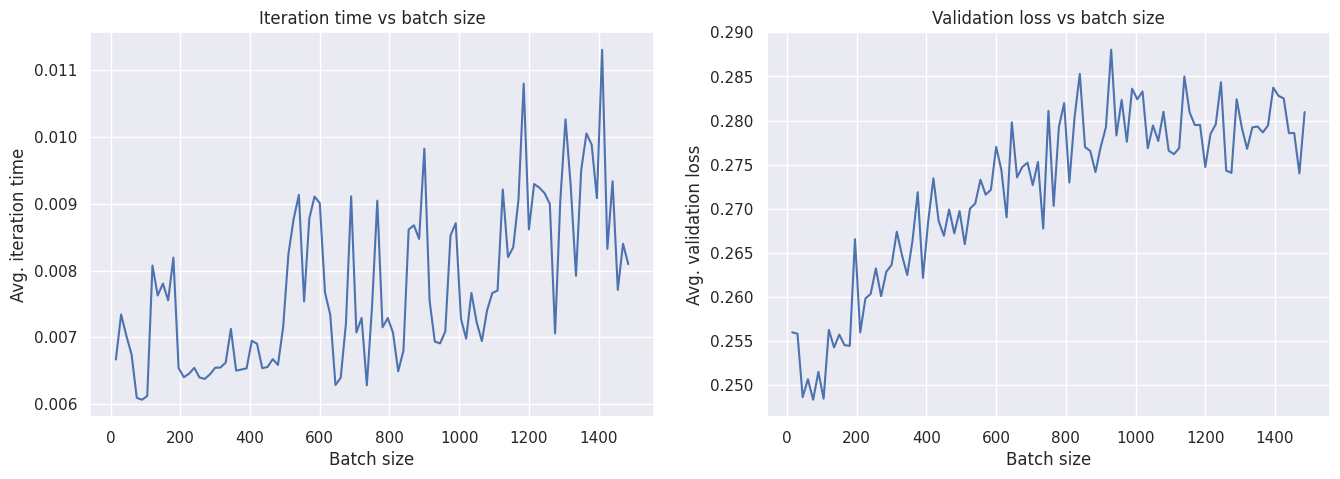

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(batch_sizes, avg_iter_counts)
ax1.set(xlabel="Batch size", ylabel="Avg. number of iterations")
ax1.set_title("Iteration count vs batch size")
ax2.plot(batch_sizes, avg_times)
ax2.set(xlabel="Batch size", ylabel="Avg. training time")
ax2.set_title("Training time vs batch size")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(batch_sizes, avg_iter_times)
ax1.set(xlabel="Batch size", ylabel="Avg. iteration time")
ax1.set_title("Iteration time vs batch size")
ax2.plot(batch_sizes, avg_losses)
ax2.set(xlabel="Batch size", ylabel="Avg. validation loss")
ax2.set_title("Validation loss vs batch size")
plt.show()

- С ростом размера батча кол-во итераций до сходимости, а вместе с ним и время на обучение, падает
- Скорость падения кол-ва итераций и времени на обучение экспоненциально уменьшается, поэтому не имеет смысла делать батчи слишком большими
- При этом с увеличением батчей предсказуемо увеличивается и время на одну итерацию
- Относительно валидационного лосса существует некоторый оптимальный размер батча &mdash; в данном случае где-то около 50-100;
  до этой точки валидационный лосс падает, а после нее он начинает (относительно) медленно расти

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на ~успешную~ посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/108537021/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [21]:
results_reg = {}

for descent in ["full", "stochastic", "momentum", "adam"]:
    descent_results_reg = []
    for lam in np.logspace(-1, 0.5, 10):
        for mu in np.logspace(-4, -1.5, 10):
            print(f"Fitting regularized {descent} gradient descent with lambda={lam} and mu={mu}")
            model = LinearRegression(make_config(descent, regularized=True, dimension=x.shape[1], lambda_=lam, mu=mu))
            model.fit(x_train, y_train)
            descent_results_reg.append({
                "lambda": lam,
                "mu": mu,
                "loss_train": model.calc_loss(x_train, y_train),
                "loss_valid": model.calc_loss(x_valid, y_valid),
                "loss_test": model.calc_loss(x_test, y_test),
                "loss_history": model.loss_history,
                "iter_count": len(model.loss_history),
                "r2": r2_score(y_test, model.predict(x_test)),
            })
            pprint({**descent_results_reg[-1], "loss_history": ["..."]})
            print()
    results_reg[descent] = descent_results_reg

best_results_reg = {key: min(value, key=lambda x: x["loss_valid"]) for key, value in results_reg.items()}

Fitting regularized full gradient descent with lambda=0.1 and mu=0.0001
{'iter_count': 41,
 'lambda': 0.1,
 'loss_history': ['...'],
 'loss_test': 0.8980659390618779,
 'loss_train': 0.8708150322351417,
 'loss_valid': 0.8625061109501487,
 'mu': 0.0001,
 'r2': 0.2643919473274331}

Fitting regularized full gradient descent with lambda=0.1 and mu=0.00018957356524063754
{'iter_count': 36,
 'lambda': 0.1,
 'loss_history': ['...'],
 'loss_test': 0.8305208206862915,
 'loss_train': 0.8055150826918007,
 'loss_valid': 0.8004304327167027,
 'mu': 0.00018957356524063754,
 'r2': 0.3236843357034148}

Fitting regularized full gradient descent with lambda=0.1 and mu=0.00035938136638046257
{'iter_count': 42,
 'lambda': 0.1,
 'loss_history': ['...'],
 'loss_test': 0.9852246426133957,
 'loss_train': 0.9545049069717422,
 'loss_valid': 0.9513591072864778,
 'mu': 0.00035938136638046257,
 'r2': 0.20378017859684583}

Fitting regularized full gradient descent with lambda=0.1 and mu=0.0006812920690579615
{'iter_c

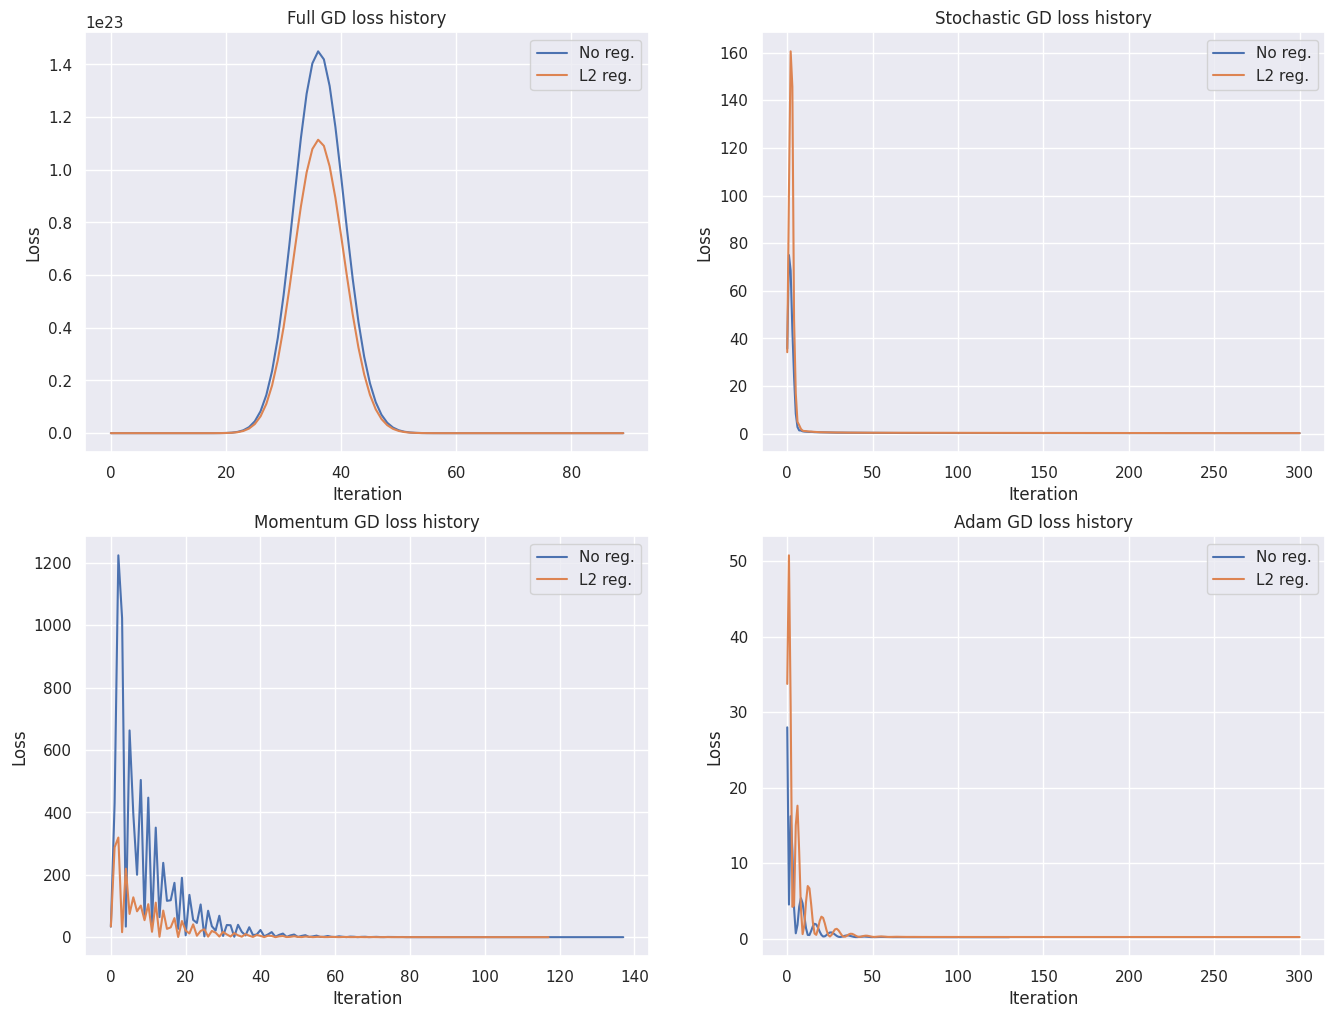

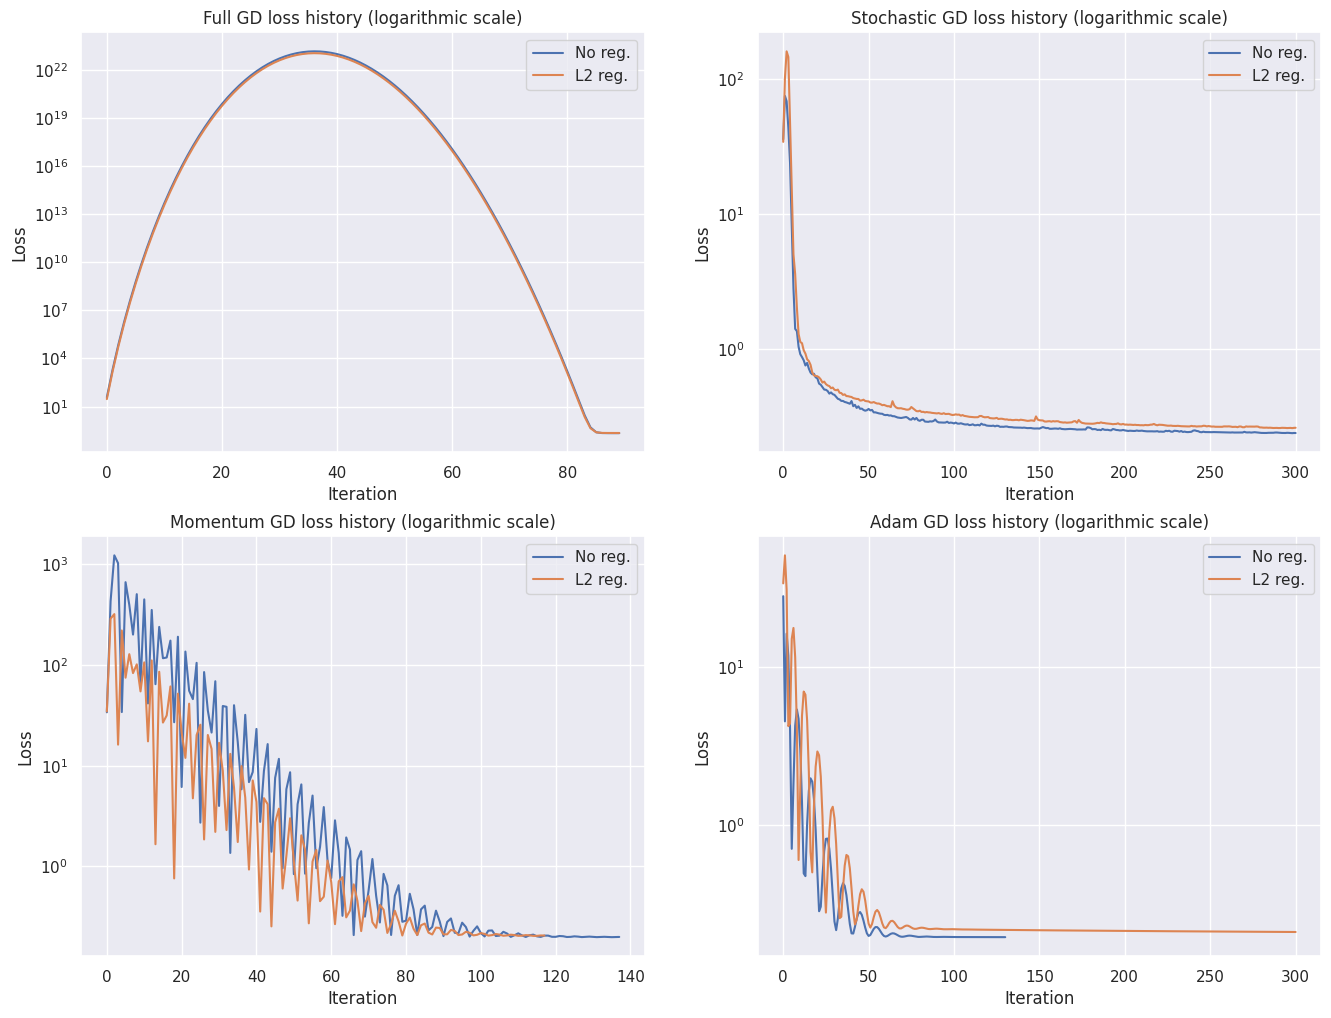

,lambda,mu,loss_train,loss_valid,loss_test,loss_history,iter_count,r2
full,3.162278,0.0001,0.22509,0.226119,0.229556,"[29.24716694905768, 1577.8745642194256, 56475....",90,0.815333
stochastic,1.0,0.0001,0.259523,0.259627,0.264915,"[34.22440812101731, 101.2057497928116, 160.533...",301,0.78651
momentum,1.467799,0.0001,0.206188,0.208616,0.208984,"[34.53999890134053, 288.27261033962156, 319.68...",118,0.832178
adam,3.162278,0.0001,0.209309,0.211957,0.212327,"[33.72682615436359, 50.751218927016915, 30.781...",301,0.837537


In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
axs = [ax1, ax2, ax3, ax4]
for descent, ax in zip(["full", "stochastic", "momentum", "adam"], axs):
    loss_history = best_results[descent]["loss_history"]
    loss_history_reg = best_results_reg[descent]["loss_history"]
    ax.plot(loss_history, label="No reg.")
    ax.plot(loss_history_reg, label="L2 reg.")
    ax.set(xlabel="Iteration", ylabel="Loss")
    ax.set_title(f"{descent.capitalize()} GD loss history")
    ax.legend()
plt.show()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
axs = [ax1, ax2, ax3, ax4]
for descent, ax in zip(["full", "stochastic", "momentum", "adam"], axs):
    loss_history = best_results[descent]["loss_history"]
    loss_history_reg = best_results_reg[descent]["loss_history"]
    ax.plot(loss_history, label="No reg.")
    ax.plot(loss_history_reg, label="L2 reg.")
    ax.set(xlabel="Iteration", ylabel="Loss", yscale="log")
    ax.set_title(f"{descent.capitalize()} GD loss history (logarithmic scale)")
    ax.legend()
plt.show()

pd.DataFrame(best_results_reg).T

- Во всех случаях лучший результат достигается при наименьшем $\mu$
- Полный градиентный спуск особо не меняется при включении регуляризации
- Momentum сходится более несолько стабильнее и быстрее, однако результат остается примерно такой же
- Adam и стохастический градиентный спуск достигают результата хуже, чем без регуляризации

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
\frac{\partial}{\partial y} L(y, a) = -\tanh{(a - y)}
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [23]:
from descents import LossFunction

results_lc = {}
for descent in ["full", "stochastic", "momentum", "adam"]:
    descent_results_lc = []
    for lam in np.logspace(-1, 1.5, 20):
            print(f"Fitting {descent} gradient descent with lambda={lam} and log-cosh loss")
            model = LinearRegression(make_config(descent, dimension=x.shape[1], lambda_=lam, loss_function=LossFunction.LogCosh))
            model.fit(x_train, y_train)
            descent_results_lc.append({
                "lambda": lam,
                "loss_train": model.calc_loss(x_train, y_train),
                "loss_valid": model.calc_loss(x_valid, y_valid),
                "loss_test": model.calc_loss(x_test, y_test),
                "loss_history": model.loss_history,
                "iter_count": len(model.loss_history),
                "r2": r2_score(y_test, model.predict(x_test)),
            })
            pprint({**descent_results_lc[-1], "loss_history": ["..."]})
            print()
    results_lc[descent] = descent_results_lc

best_results_lc = {key: min(value, key=lambda x: x["loss_valid"]) for key, value in results_lc.items()}

Fitting full gradient descent with lambda=0.1 and log-cosh loss
{'iter_count': 120,
 'lambda': 0.1,
 'loss_history': ['...'],
 'loss_test': 1.9982492568291002,
 'loss_train': 2.016367809915825,
 'loss_valid': 2.0103586254156136,
 'r2': -6.730731087110061}

Fitting full gradient descent with lambda=0.13538761800225438 and log-cosh loss
{'iter_count': 135,
 'lambda': 0.13538761800225438,
 'loss_history': ['...'],
 'loss_test': 0.8387066522511585,
 'loss_train': 0.8414435008577285,
 'loss_valid': 0.8406259667655706,
 'r2': -1.232593058488653}

Fitting full gradient descent with lambda=0.18329807108324356 and log-cosh loss
{'iter_count': 124,
 'lambda': 0.18329807108324356,
 'loss_history': ['...'],
 'loss_test': 0.6064522596735467,
 'loss_train': 0.5975628502893052,
 'loss_valid': 0.5950002984887837,
 'r2': -0.4881146534278624}

Fitting full gradient descent with lambda=0.24816289228368257 and log-cosh loss
{'iter_count': 100,
 'lambda': 0.24816289228368257,
 'loss_history': ['...'],
 'lo

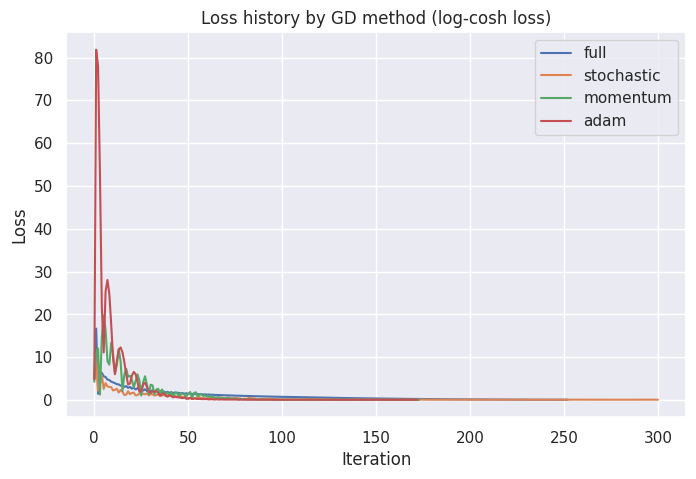

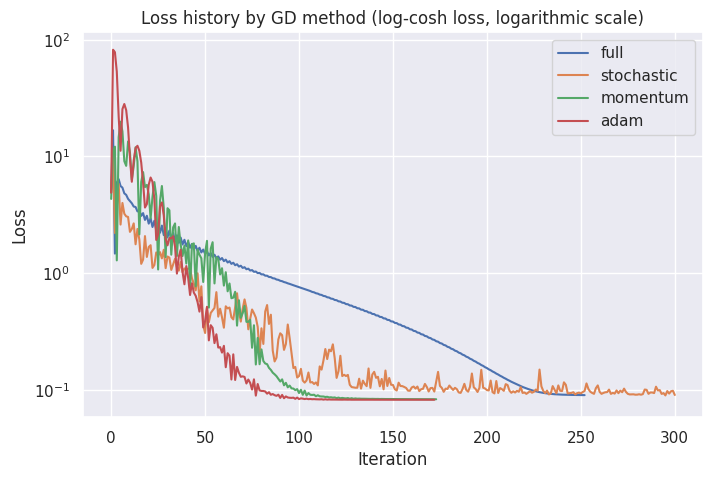

,lambda,loss_train,loss_valid,loss_test,loss_history,iter_count,r2
full,17.252105,0.0898,0.090624,0.092,"[5.1758008181038395, 16.70662777645304, 1.4655...",253,0.821405
stochastic,12.74275,0.090065,0.090422,0.092222,"[4.891276300863696, 10.834697349366902, 2.2026...",301,0.821265
momentum,12.74275,0.082785,0.083836,0.08514,"[4.310951794238427, 11.069816468975842, 12.094...",174,0.835414
adam,23.357215,0.081967,0.083071,0.084358,"[4.876800183950013, 81.81665700782871, 77.9673...",173,0.837203


In [24]:
best_results_lc_df = pd.DataFrame(best_results_lc).T

for descent, loss_history in best_results_lc_df["loss_history"].items():
    plt.plot(loss_history, label=descent)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss history by GD method (log-cosh loss)")
plt.legend()
plt.show()

for descent, loss_history in best_results_lc_df["loss_history"].items():
    plt.plot(loss_history, label=descent)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss history by GD method (log-cosh loss, logarithmic scale)")
plt.legend()
plt.show()

best_results_lc_df

- Полный градиентный спуск гораздо более стабилен, чем с MSE
- Результат стохастического градиентного спуска лучше, чем с MSE; результаты остальных методов примерно такие же, но кол-во итераций при этом несколько больше

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [25]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [26]:
# YOUR CODE: